In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [2]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

<AxesSubplot:>

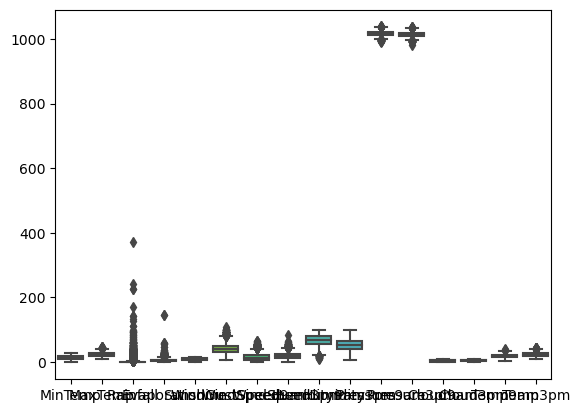

In [3]:
import seaborn as sns
sns.boxplot(data=df)

In [4]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [5]:
def randomimputation(df,variable):
    df[variable]=df[variable]
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable]=random_sample
    

In [6]:
randomimputation(df,'Cloud9am')
randomimputation(df,'Cloud3pm')
randomimputation(df,'Evaporation')
randomimputation(df,'Sunshine')

In [7]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation         0
Sunshine            0
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am            0
Cloud3pm            0
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [8]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,8425.000000,8425.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,8425.000000,8425.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.395039,7.628368,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.581009,4.497329,17.762015,22.442934
std,5.403596,6.136408,10.459379,4.975088,3.899493,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877215,2.728847,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.700000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.600000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,6.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


In [9]:
num_fet=[feature for feature  in df.columns if df[feature].dtypes!='O']
dis_fet=[feature for feature in num_fet if len(df[feature].unique())<25]
cont_fet=[feature for feature in num_fet if feature not in dis_fet]
cat_fet=[feature for feature in df.columns if feature not in num_fet]

In [10]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,3.0,13.8,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,8.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,2.2,7.6,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,1.0,4.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,4.6,7.7,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,2.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,1.8,8.0,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,8.0,7.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,3.8,11.9,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,6.4,1.2,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,8.0,4.0,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,12.6,7.1,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,1.0,1.0,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,4.2,13.0,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,6.0,5.0,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,4.0,13.1,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [11]:
import warnings 
warnings.filterwarnings('ignore')

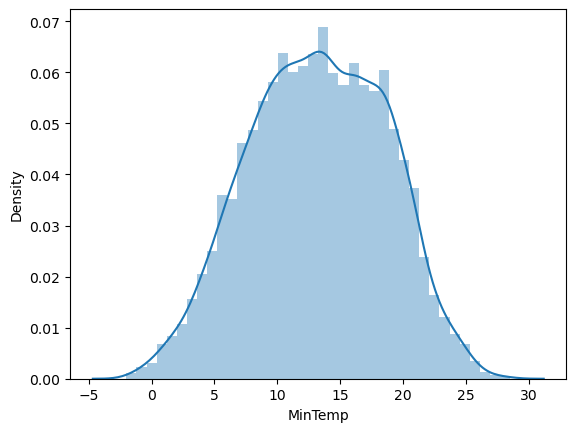

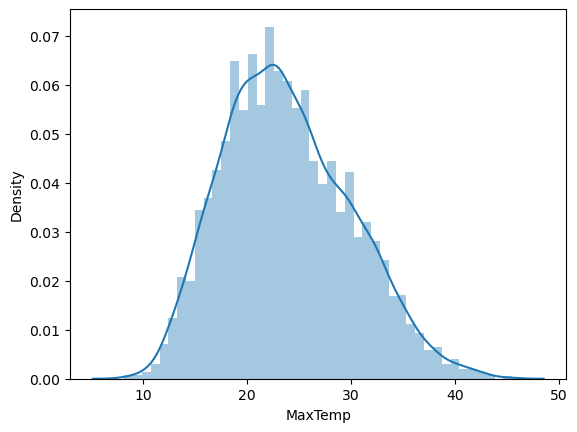

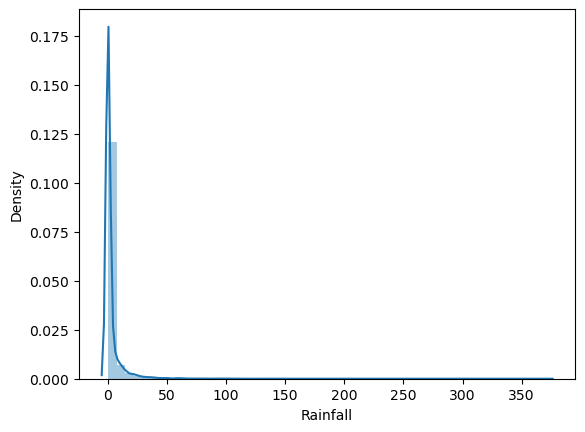

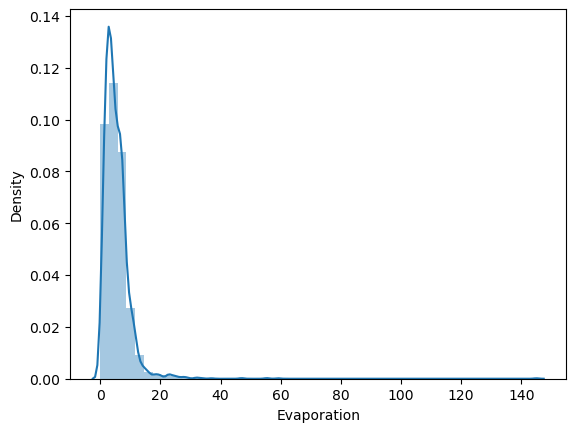

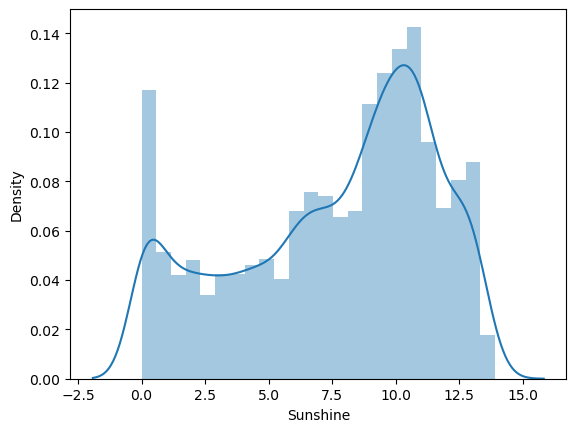

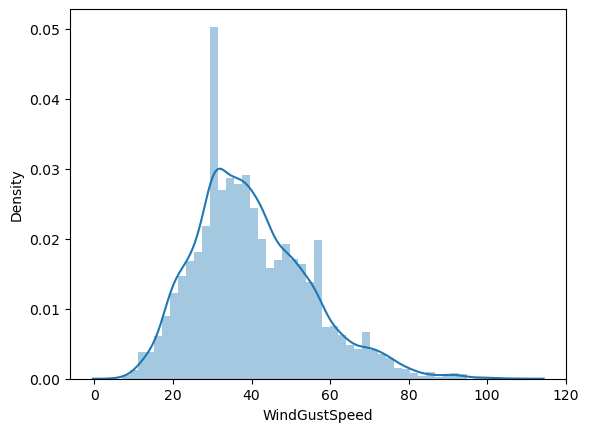

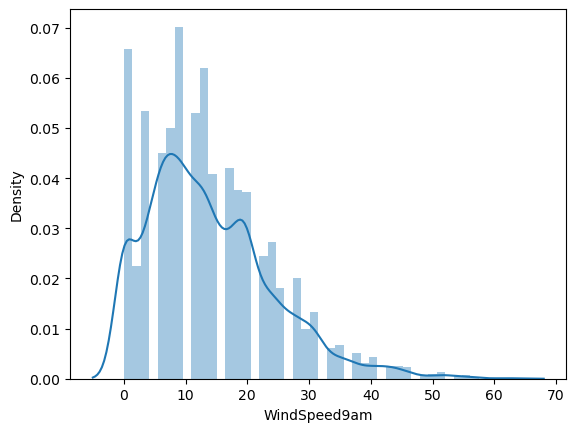

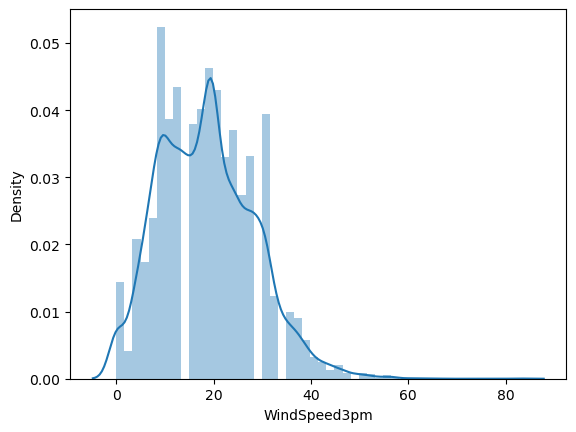

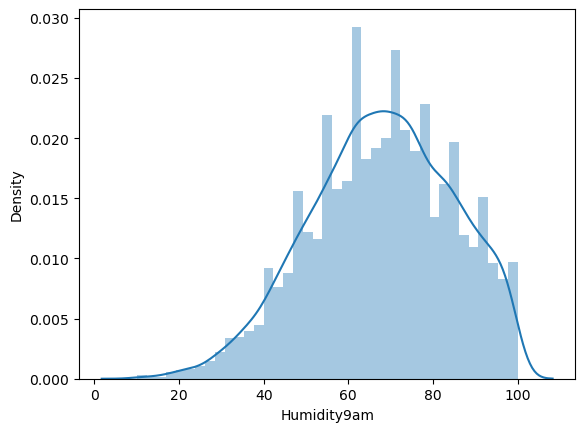

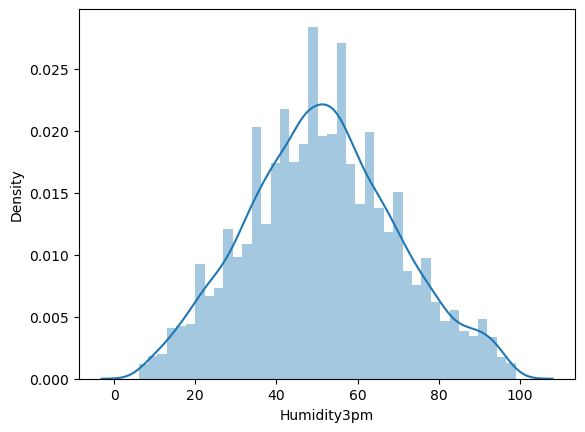

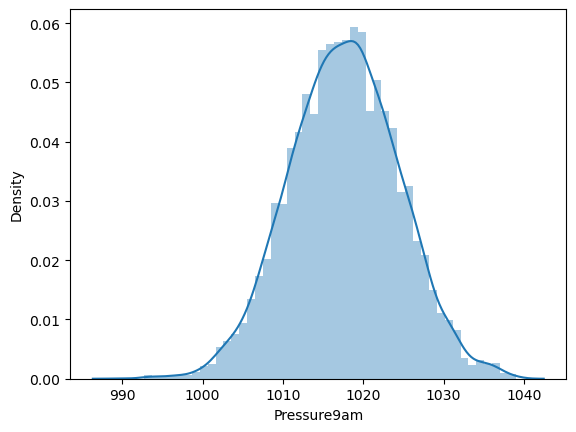

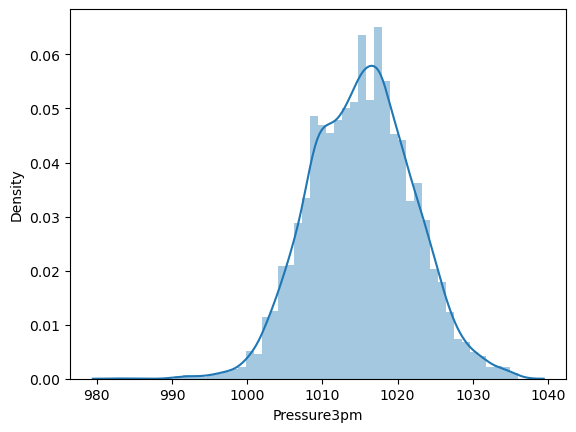

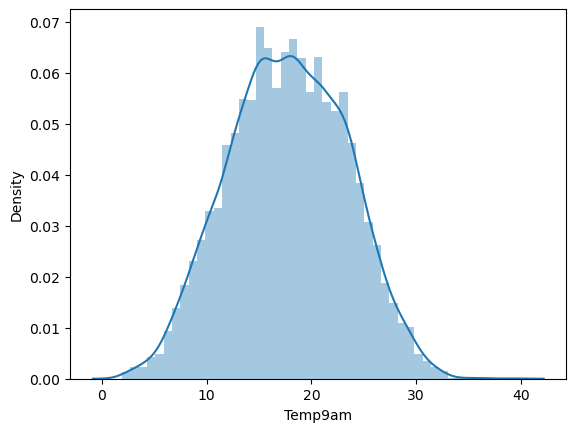

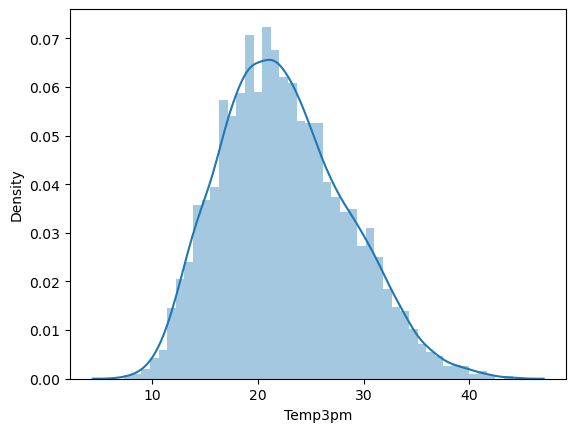

In [12]:
import matplotlib.pyplot as plt
for feature in cont_fet:
    data=df.copy()
    sns.distplot(df[feature])
    plt.show()

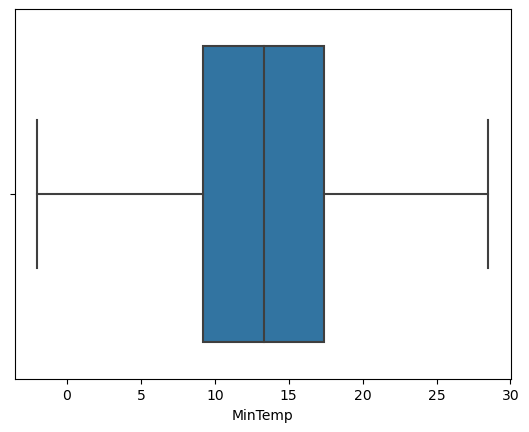

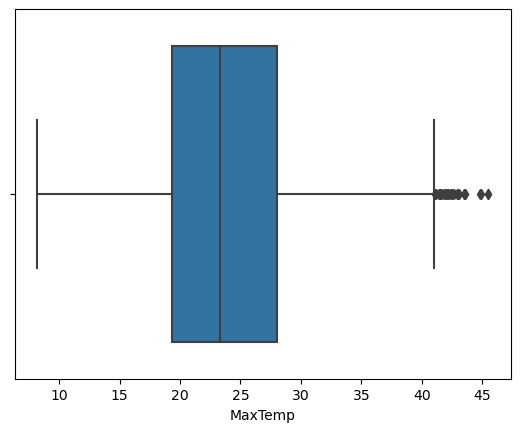

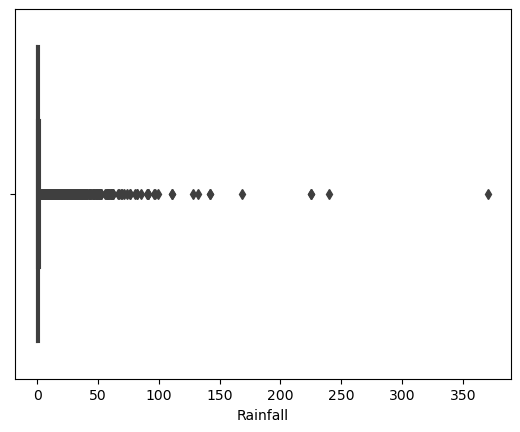

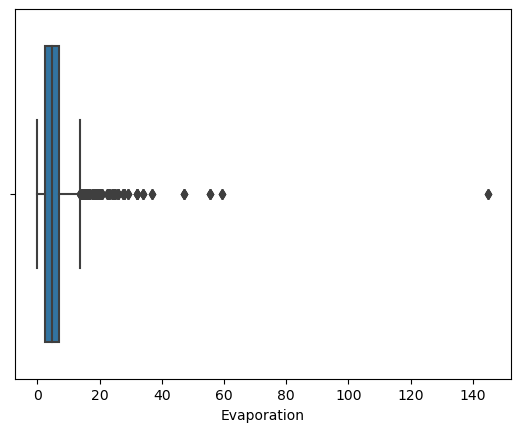

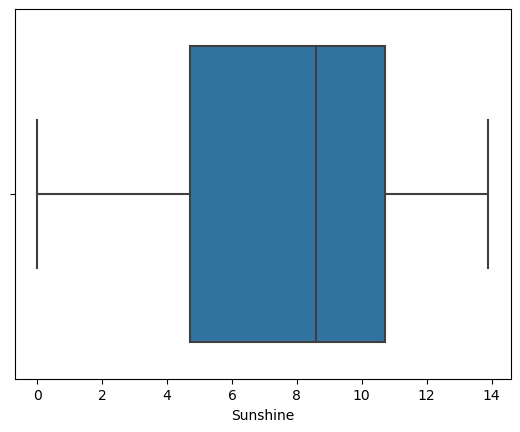

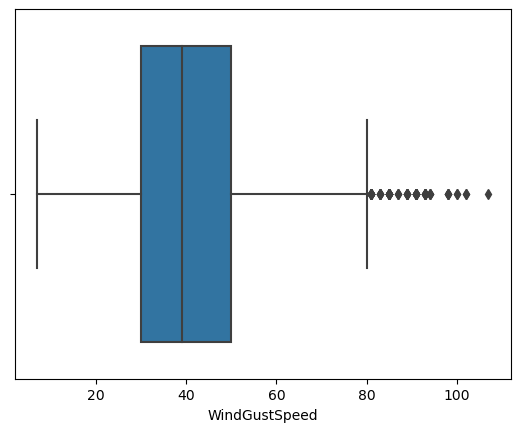

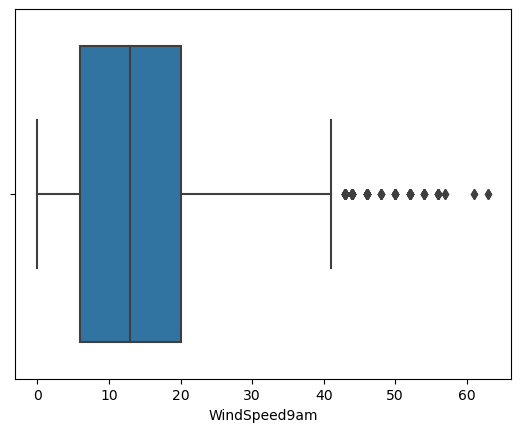

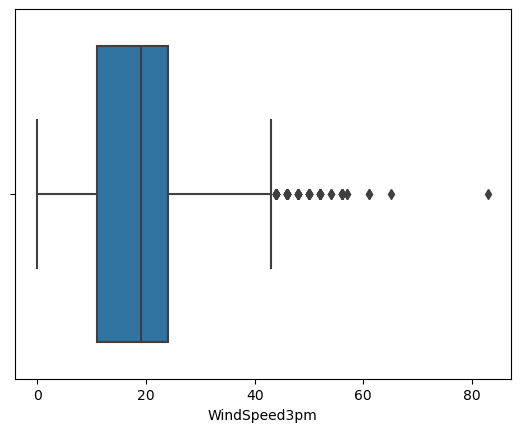

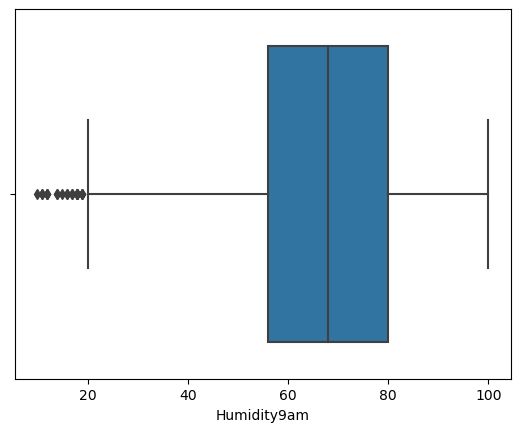

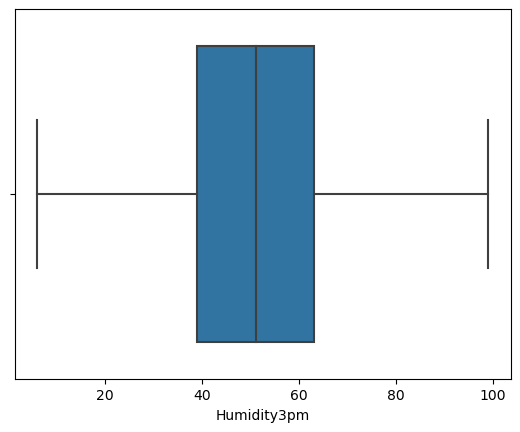

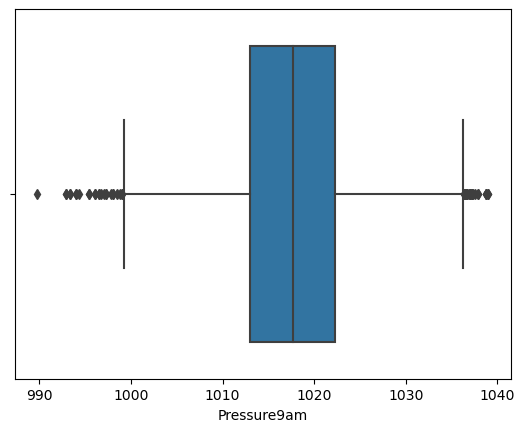

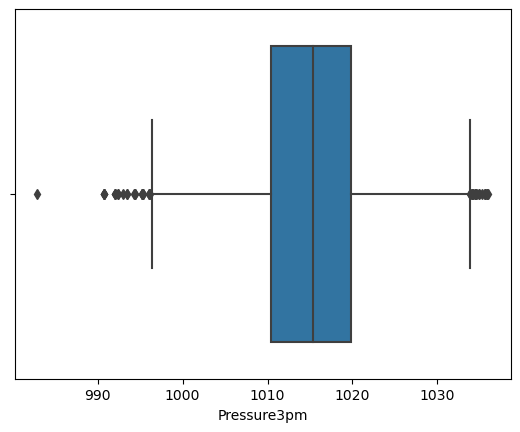

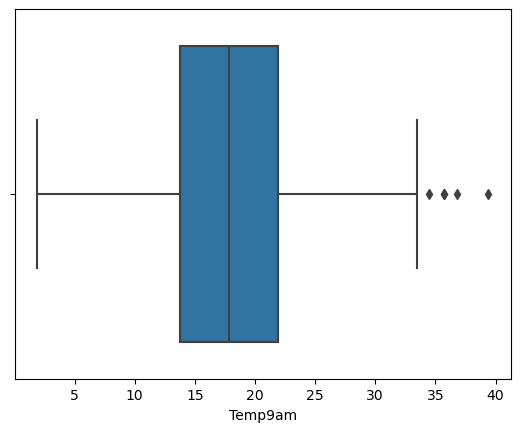

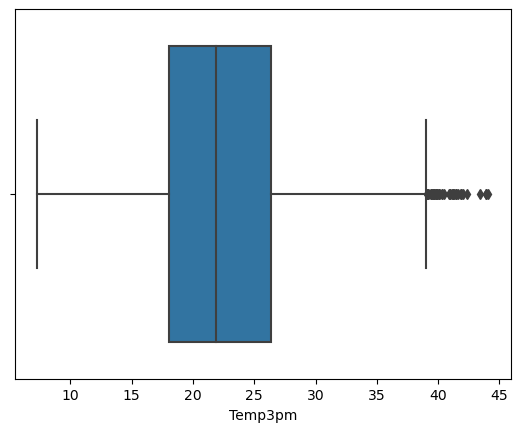

In [13]:
for feature in cont_fet:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.show()

In [14]:
for features in cont_fet:
    if (df[features].isnull().sum()>0):
        df[features]=df[features].fillna(df[features].median())

In [15]:
df.isnull().sum()

Date               0
Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
Evaporation        0
Sunshine           0
WindGustDir      991
WindGustSpeed      0
WindDir9am       829
WindDir3pm       308
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am           0
Cloud3pm           0
Temp9am            0
Temp3pm            0
RainToday        240
RainTomorrow     239
dtype: int64

In [16]:
df['RainTomorrow']=pd.get_dummies(df['RainTomorrow'],drop_first=True)
df['RainToday']=pd.get_dummies(df['RainToday'],drop_first=True)

In [17]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,3.0,13.8,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,8.0,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,2.2,7.6,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,1.0,4.0,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,4.6,7.7,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,2.0,2.0,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,1.8,8.0,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,8.0,7.0,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,3.8,11.9,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,6.4,1.2,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,8.0,4.0,10.1,22.4,0,0
8421,2017-06-22,Uluru,3.6,25.3,0.0,12.6,7.1,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,1.0,1.0,10.9,24.5,0,0
8422,2017-06-23,Uluru,5.4,26.9,0.0,4.2,13.0,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,6.0,5.0,12.5,26.1,0,0
8423,2017-06-24,Uluru,7.8,27.0,0.0,4.0,13.1,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0


In [18]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

In [19]:
df['Location']=le.fit_transform(df['Location'])
df['WindGustDir']=le.fit_transform(df['WindGustDir'])
df['WindDir9am']=le.fit_transform(df['WindDir9am'])
df['WindDir3pm']=le.fit_transform(df['WindDir3pm'])

In [20]:
df[['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']]

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,1,13,13,14,0,0
1,2008-12-02,1,14,6,15,0,0
2,2008-12-03,1,15,13,15,0,0
3,2008-12-04,1,4,9,0,0,0
4,2008-12-05,1,13,1,7,0,0
...,...,...,...,...,...,...,...
8420,2017-06-21,9,0,9,1,0,0
8421,2017-06-22,9,6,9,3,0,0
8422,2017-06-23,9,3,9,14,0,0
8423,2017-06-24,9,9,10,3,0,0


In [21]:
df['Date']=pd.to_datetime(df['Date'],format="%Y-%m-%dT",errors='coerce')
df['Date_Month']=df['Date'].dt.month

In [22]:
df['Date_Day']=df['Date'].dt.day
df['Date_Year']=df['Date'].dt.year

In [23]:
df[['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']]

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,1,13,13,14,0,0
1,2008-12-02,1,14,6,15,0,0
2,2008-12-03,1,15,13,15,0,0
3,2008-12-04,1,4,9,0,0,0
4,2008-12-05,1,13,1,7,0,0
...,...,...,...,...,...,...,...
8420,2017-06-21,9,0,9,1,0,0
8421,2017-06-22,9,6,9,3,0,0
8422,2017-06-23,9,3,9,14,0,0
8423,2017-06-24,9,9,10,3,0,0


In [24]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_Month,Date_Day,Date_Year
0,2008-12-01,1,13.4,22.9,0.6,3.0,13.8,13,44.0,13,...,1007.1,8.0,8.0,16.9,21.8,0,0,12,1,2008
1,2008-12-02,1,7.4,25.1,0.0,2.2,7.6,14,44.0,6,...,1007.8,1.0,4.0,17.2,24.3,0,0,12,2,2008
2,2008-12-03,1,12.9,25.7,0.0,4.6,7.7,15,46.0,13,...,1008.7,2.0,2.0,21.0,23.2,0,0,12,3,2008
3,2008-12-04,1,9.2,28.0,0.0,1.8,8.0,4,24.0,9,...,1012.8,8.0,7.0,18.1,26.5,0,0,12,4,2008
4,2008-12-05,1,17.5,32.3,1.0,3.8,11.9,13,41.0,1,...,1006.0,7.0,8.0,17.8,29.7,0,0,12,5,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,9,2.8,23.4,0.0,6.4,1.2,0,31.0,9,...,1020.3,8.0,4.0,10.1,22.4,0,0,6,21,2017
8421,2017-06-22,9,3.6,25.3,0.0,12.6,7.1,6,22.0,9,...,1019.1,1.0,1.0,10.9,24.5,0,0,6,22,2017
8422,2017-06-23,9,5.4,26.9,0.0,4.2,13.0,3,37.0,9,...,1016.8,6.0,5.0,12.5,26.1,0,0,6,23,2017
8423,2017-06-24,9,7.8,27.0,0.0,4.0,13.1,9,28.0,10,...,1016.5,3.0,2.0,15.1,26.0,0,0,6,24,2017


<AxesSubplot:>

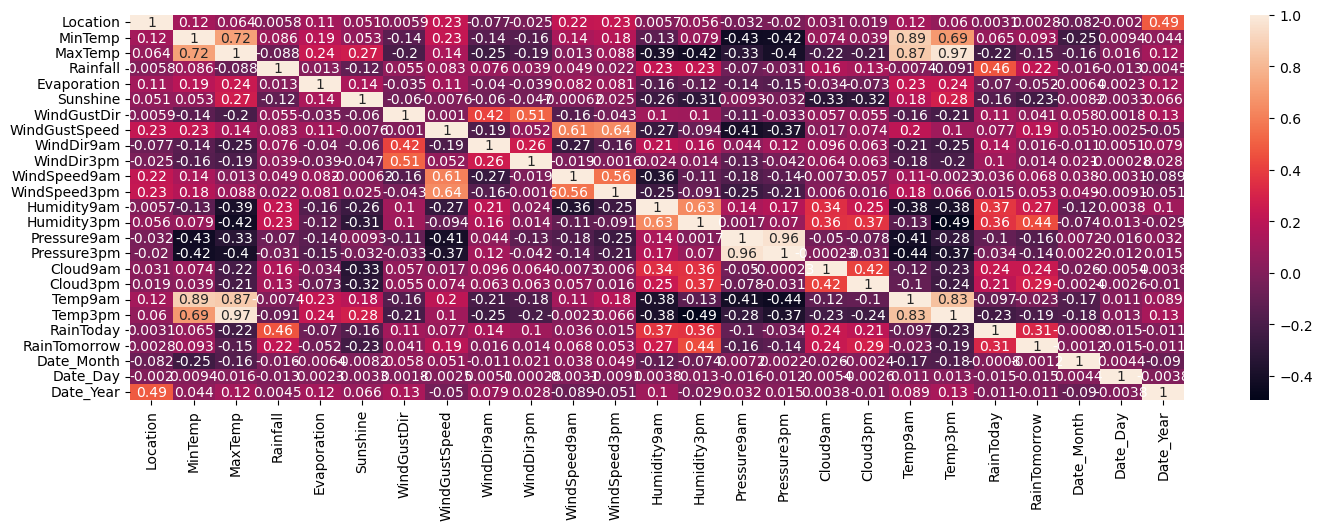

In [25]:
plt.figure(figsize=(17,5))
sns.heatmap(df.corr(),annot=True)

In [26]:
cont_fet

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

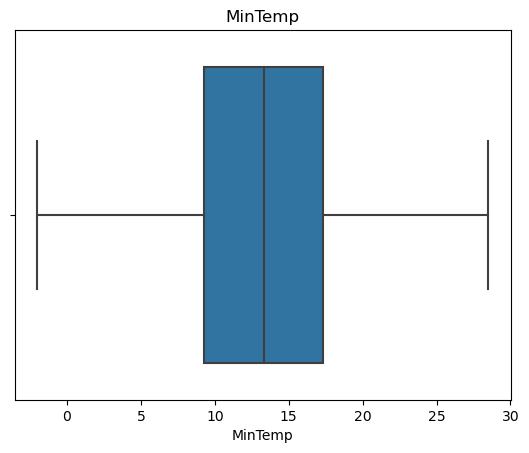

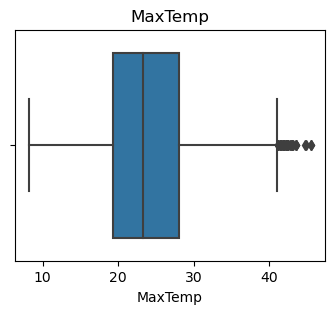

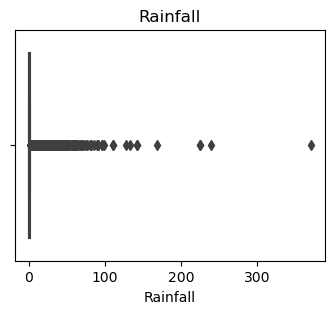

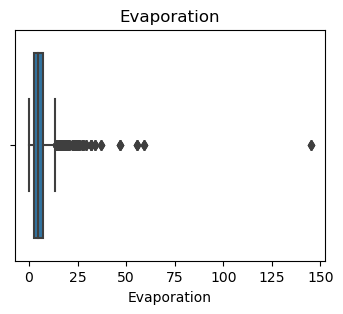

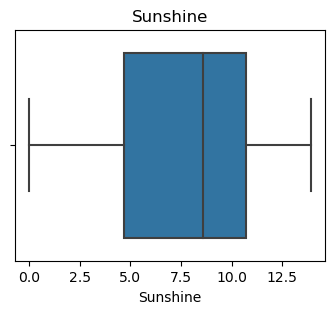

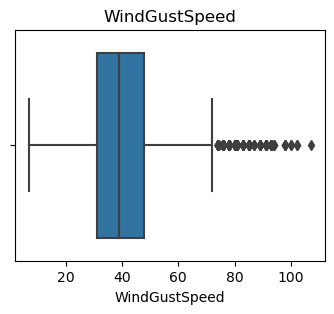

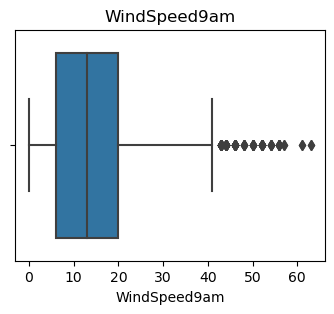

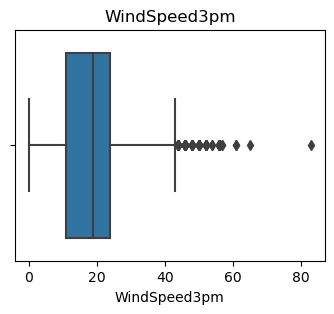

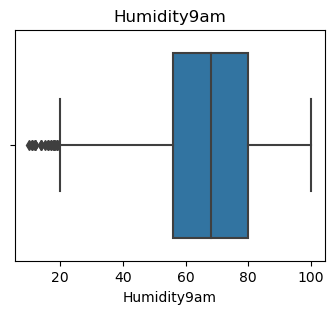

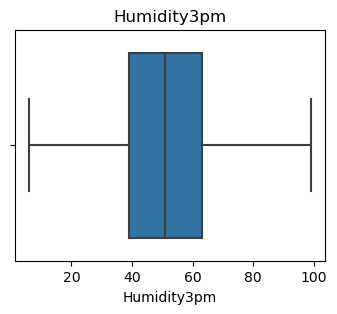

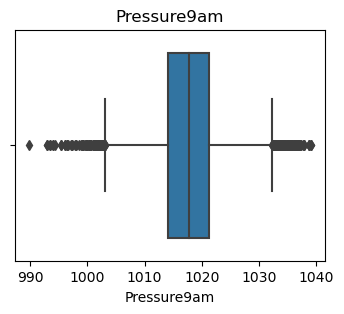

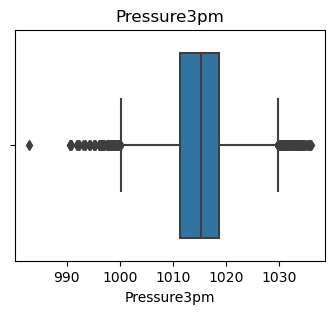

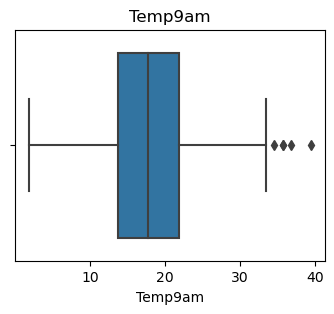

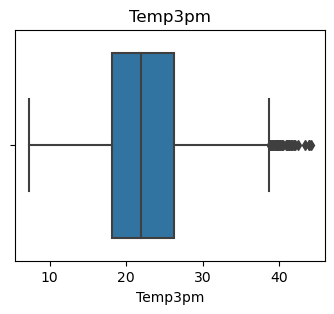

<Figure size 400x300 with 0 Axes>

In [27]:
for feature in cont_fet:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(4,3))

In [28]:
def outliers(df,variable):
    iqr=df[variable].quantile(0.75)-df[variable].quantile(0.25)
    lower_bridge=df[variable].quantile(0.25)-(iqr*1.5)
    upper_bridge=df[variable].quantile(0.75)+(iqr*1.5)
    df.loc[df[variable]>=upper_bridge,variable]=upper_bridge
    df.loc[df[variable]<=lower_bridge,variable]=lower_bridge

In [29]:
for feature in cont_fet:
    outliers(df,str(feature))

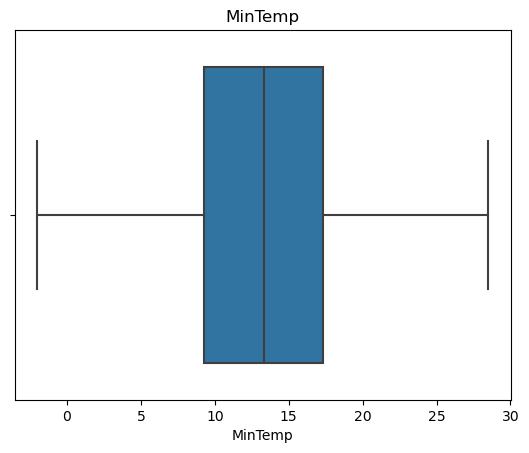

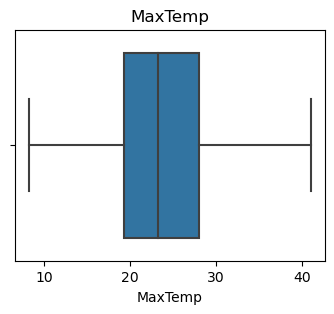

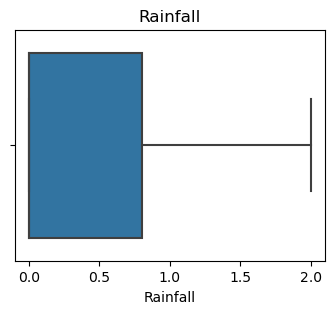

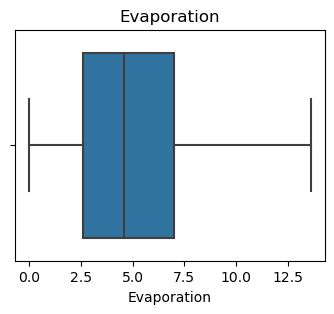

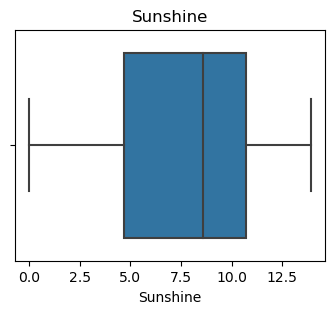

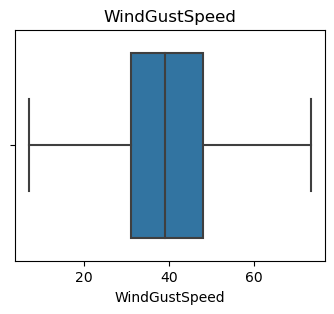

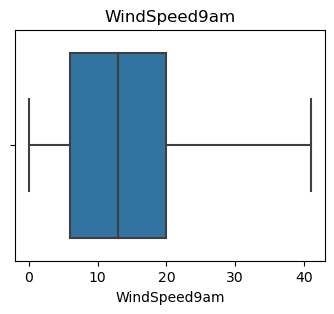

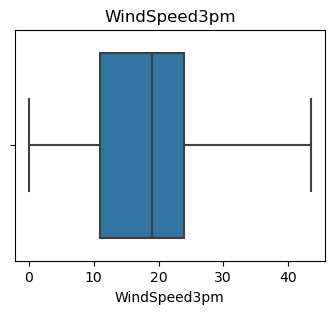

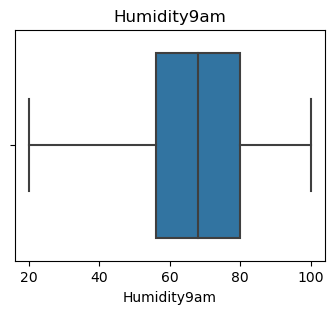

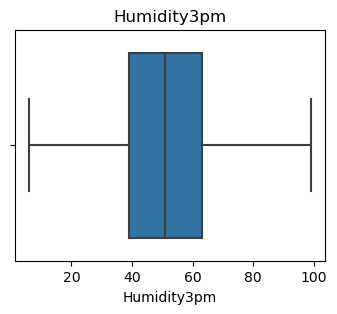

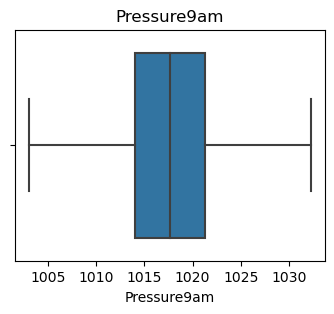

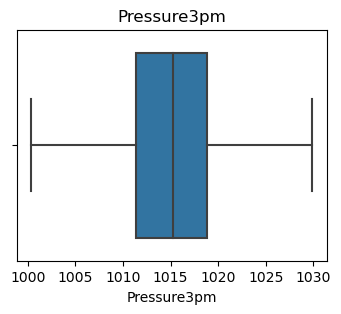

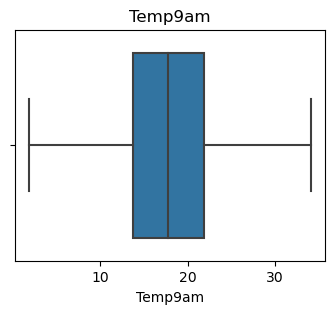

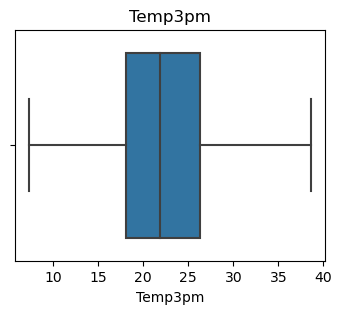

<Figure size 400x300 with 0 Axes>

In [30]:
for feature in cont_fet:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(4,3))

In [31]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_Month,Date_Day,Date_Year
0,2008-12-01,1,13.4,22.9,0.6,3.0,13.8,13,44.0,13,...,1007.1,8.0,8.0,16.9,21.8,0,0,12,1,2008
1,2008-12-02,1,7.4,25.1,0.0,2.2,7.6,14,44.0,6,...,1007.8,1.0,4.0,17.2,24.3,0,0,12,2,2008
2,2008-12-03,1,12.9,25.7,0.0,4.6,7.7,15,46.0,13,...,1008.7,2.0,2.0,21.0,23.2,0,0,12,3,2008
3,2008-12-04,1,9.2,28.0,0.0,1.8,8.0,4,24.0,9,...,1012.8,8.0,7.0,18.1,26.5,0,0,12,4,2008
4,2008-12-05,1,17.5,32.3,1.0,3.8,11.9,13,41.0,1,...,1006.0,7.0,8.0,17.8,29.7,0,0,12,5,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,9,2.8,23.4,0.0,6.4,1.2,0,31.0,9,...,1020.3,8.0,4.0,10.1,22.4,0,0,6,21,2017
8421,2017-06-22,9,3.6,25.3,0.0,12.6,7.1,6,22.0,9,...,1019.1,1.0,1.0,10.9,24.5,0,0,6,22,2017
8422,2017-06-23,9,5.4,26.9,0.0,4.2,13.0,3,37.0,9,...,1016.8,6.0,5.0,12.5,26.1,0,0,6,23,2017
8423,2017-06-24,9,7.8,27.0,0.0,4.0,13.1,9,28.0,10,...,1016.5,3.0,2.0,15.1,26.0,0,0,6,24,2017


In [32]:
feature=df.drop(['Date','Rainfall'],axis=1)

In [33]:
target=df['Rainfall']

In [34]:
feature.shape

(8425, 24)

In [35]:
target.shape

(8425,)

In [36]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [37]:
best_accuracy=0
besst_random_state=0
for i in range(0,100):
    feature_train,feature_test,target_train,target_test=train_test_split(feature,target,test_size=0.2,random_state=i)
    lr.fit(feature_train,target_train)
    pred_train=lr.predict(feature_train)
    pred_test=lr.predict(feature_test)
    train_accuracy=r2_score(target_train,pred_train)
    test_accuracy=r2_score(target_test,pred_test)
    
    if test_accuracy > best_accuracy:
        best_accuracy=test_accuracy
        best_random_state=i
print(f'The best random state is : {best_random_state} with the highest accuracy :{best_accuracy}')        

The best random state is : 50 with the highest accuracy :0.9613964625157359


In [38]:
import seaborn as sns 

In [39]:
r2_score(target_test,pred_test)

0.9513938728837856

In [40]:
train_accuracy=r2_score(target_train,pred_train)
test_accuracy=r2_score(target_test,pred_test)
from sklearn.model_selection import cross_val_score
for v in range(2,10):
    cv_score=cross_val_score(lr,feature,target,cv=v)
    cv_mean=cv_score.mean()
    print(f'cross fold {v} the cv score is {cv_mean} and the accuracy_score for training is {train_accuracy} and the accuracy for testing is {test_accuracy}')

cross fold 2 the cv score is 0.9514476707826103 and the accuracy_score for training is 0.9527646929057827 and the accuracy for testing is 0.9513938728837856
cross fold 3 the cv score is 0.951790459180133 and the accuracy_score for training is 0.9527646929057827 and the accuracy for testing is 0.9513938728837856
cross fold 4 the cv score is 0.9518391046593919 and the accuracy_score for training is 0.9527646929057827 and the accuracy for testing is 0.9513938728837856
cross fold 5 the cv score is 0.9517555460789051 and the accuracy_score for training is 0.9527646929057827 and the accuracy for testing is 0.9513938728837856
cross fold 6 the cv score is 0.9517631833209398 and the accuracy_score for training is 0.9527646929057827 and the accuracy for testing is 0.9513938728837856
cross fold 7 the cv score is 0.9517947350256684 and the accuracy_score for training is 0.9527646929057827 and the accuracy for testing is 0.9513938728837856
cross fold 8 the cv score is 0.9519169661297121 and the acc

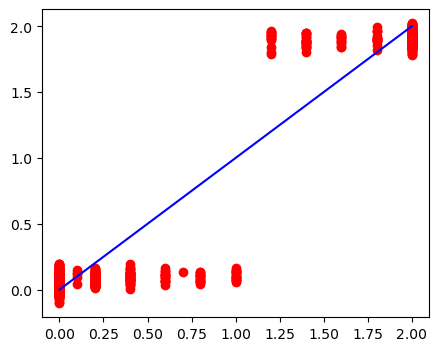

In [41]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(5,4))

plt.scatter(x=target_test,y=pred_test,color='r')
plt.plot(target_test,target_test,color='b')
plt.show()

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.01,.1,1.10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(feature_train,pred_train)
print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [50]:
from sklearn.ensemble import RandomForestRegressor
rc=RandomForestRegressor()
rc.fit(feature_train,target_train)


target_pred=rc.predict(feature_test)
accuarcy=rc.score(feature_test,target_test)
print('Accuracy ',accuracy)

Accuracy  0.961479773293031


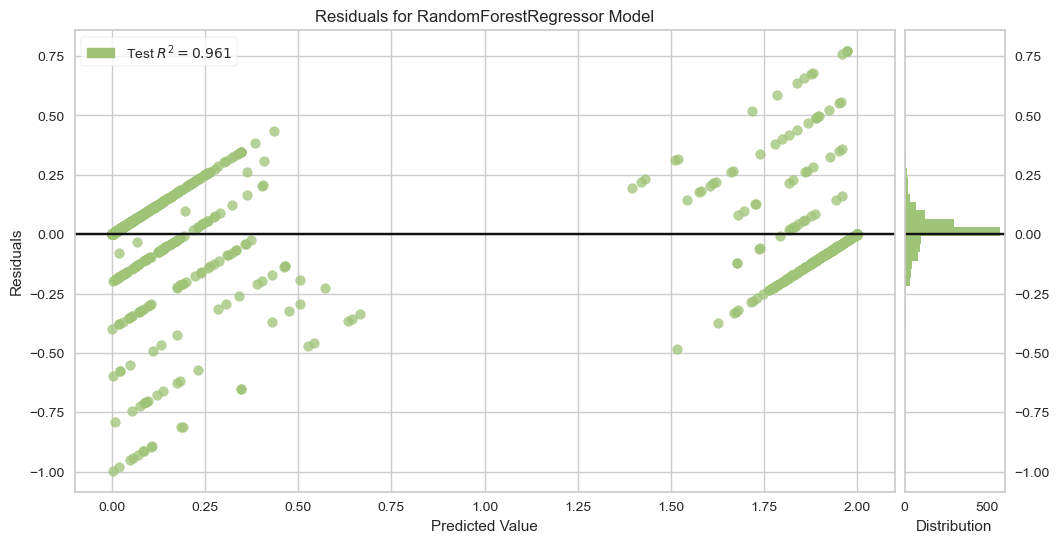

<AxesSubplot:title={'center':'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [45]:
from yellowbrick.regressor import ResidualsPlot
plt.figure(figsize=(12,6))
vs=ResidualsPlot(rc,hist=True,qqplot=False)
vs.score(feature_test,target_test)
vs.show()

# Decison Tree

In [51]:
from sklearn.tree import DecisionTreeRegressor
dc=DecisionTreeRegressor()
dc.fit(feature_train,target_train)
target_pred=dc.predict(feature_test)
accuracy=rc.score(feature_test,target_test)
print(accuarcy)

0.9614599562537466


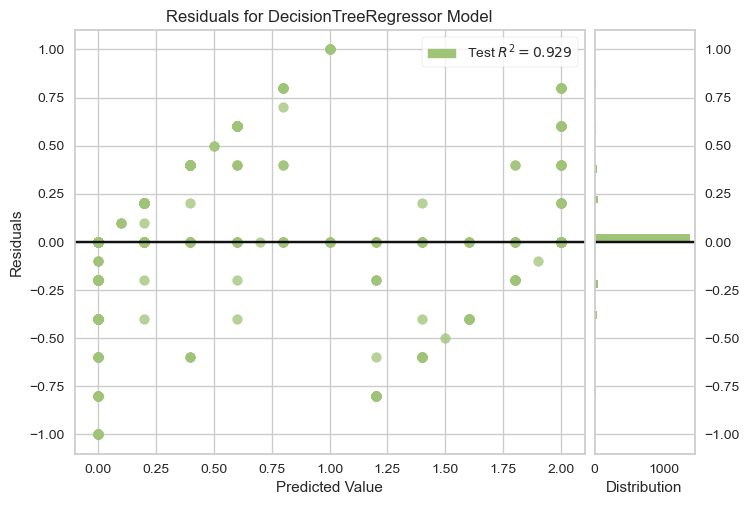

<AxesSubplot:title={'center':'Residuals for DecisionTreeRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [47]:
vs=ResidualsPlot(dc,hist=True,qqplot=False)
vs.score(feature_test,target_test)
vs.show()

In [54]:
import xgboost as xg

In [55]:
from sklearn.metrics import r2_score

In [58]:
xg1=xg.XGBRegressor()
xg1.fit(feature_train,target_train)
target_pred=xg1.predict(feature_test)
accuracy=r2_score(target_test,target_pred)
print('Acuracy',accuracy)

Acuracy 0.9589020441299498


In [60]:
import dask.dataframe as dd
from sklearn.linear_model import LinearRegression
feature_train_dask=dd.from_pandas(feature_train,npartitions=1)
target_train_dask=dd.from_pandas(target_train,npartitions=1)
feature_test_dask=dd.from_pandas(feature_test,npartitions=1)
target_test_dask=dd.from_pandas(target_test,npartitions=1)


In [62]:
lr=LinearRegression()
lr.fit(feature_train_dask,target_train_dask)

LinearRegression()

In [63]:
target_pred_dask=lr.predict(feature_test_dask)

In [64]:
accuarcy_dask=lr.score(feature_test_dask,target_test_dask)
print(accuarcy_dask)

0.9513938728837856


# Saving the model

In [71]:
import pickle
filename='Rainfall model.pkl'
pickle.dump(dc,open(filename,'wb'))

In [73]:
load_model=pickle.load(open(filename,'rb'))
score=load_model.score(feature_test,target_test)
print(score*100)

93.20179227925051


# Conclusion

 * imported the requried liabraies 
* checked the null values and thier treatment
* checked the distribution between each columns using the distplot
* checked the outliers 
* we used encoding techniwues to cahnge the categorical data into numerical 
* we removed the outliers 
* used scaling techniques
* splited the data into training and testing 
* used the various model to understand and check the acuracy between the models 
* we used decison tree , randomforest , linearregression to save check the accaurcay
* we saved the model with the decsion tree model as it gives us the good accuarcy